# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования** - определить факторы, которые больше всего влияют на продаваемость продукта.

**Задачи исследования**:
1. Подготовить данные - заменить названия столбцов, преобразовать данные в нужные типы, обработать пропуски, рассчитать новые значения;
2. Провести исследовательский анализ данных - изучить сколько игр выпускалось в разные годы, как менялись продажи по платформам, как влияют на продажи внутри одной платформы отзывы пользователей и критиков, распределение игр по жанрам;
3. Составить портрет пользователя каждого региона - самые популярные платформы (топ-5), самые популярные жанры (топ-5), влияние рейтинга ESRB на продажи в отдельном регионе;
4. Проверить гипотезы - средние пользовательские рейтинги платформ Xbox One и PC одинаковые, средние пользовательские рейтинги жанров Action и Sports разные.

**Ход исследования**

О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Проверив данные на ошибки, на этапе предобработки будем искать возможность исправить самые критичные из них.
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных;
 2. Предобработка данных;
 3. Исследовательский анализ данных и проверка гипотез.

# 1. Обзор данных

Подключаемые все необходимые для выполнения исследования библиотеки:

In [1]:
import pandas as pd # библиотека для манипуляции с табличными данными
import seaborn as sns # библиотека для визуализации

Загружаем данные из файла:

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Выводим общую информацию:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Определяем, в каких столбцах есть пропуски:

In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Проверяем на наличие явных дубликатов:

In [5]:
data.duplicated().sum()

0

**Выводы**

В таблице 16 715 записей и 11 столбцов. Данных достаточно для проверки гипотез. 
Явных дубликатов нет, однако количество значений в 5 столбцах (название игры, год выпуска, жанр, оценка критиков, оценка пользователей, рейтинг от организации ESRB) различается - значит, в данных есть пропущенные значения.
Чтобы двигаться дальше, нужно устранить проблемы в данных.

# 2. Предобработка данных

### Замена названий столбцов

Приводим к нижнему регистру названия столбцов:

In [6]:
data.columns = map(str.lower, data.columns)

Проверяем, что все названия столбцов теперь в нижнем регистре:

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование типов данных

Значительные пропуски в показателе "рейтинг от организации ESRB" могут быть связаны с тем, что ESRB определяет рейтинги для компьютерных видеоигр в США и Канаде, в то время как многие игры даже не локализуются на их территории. Таким играм мы присвоим значение - 'no rating' - без рейтинга. Причиной пропусков в параметрах "оценка критиков" и "оценка пользователей" могут быть связаны естественными причинами - просто их никто не оставил (как, например, многие товары в интернет-магазинах не имеют отзывов). Поскольку стандартными средствами без дополнительных источников заполнить их не получится, оставляем их без изменений. Пропусков в названии игры и жанра незначительно, такая же ситуация с годом выпуска - связаны они, скорее всего, с ошибкой ввода/чтения данных. Заполнять мы их тоже не будем.

Преобразуем значение года выпуска игры в целочисленное:

In [8]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype(int)

Изменение типа данных необходимо c логической точки зрения - значение года это целое число.

Аббревиатура tbd расшифровывается как "To Be Determined", то есть "Будет определёно". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. В нашем случае это относится к оценкам пользователей. Поэтому правомерно будет заменить такие значения на NaN:

In [9]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = None

После этого можно преобразовывать строковое значение оценки пользователей в число:

In [10]:
data['user_score'] = pd.to_numeric(data['user_score'])

Изменение типа данных нужно для последующего расчёта корреляции между пользовательскими оценками
и продажами, а также замены пропусков медианным значением.

### Обработка пропусков

Заполняем пропуски в показетеле "рейтинг от организации ESRB" значением "no rating" - без рейтинга:

In [11]:
data.loc[data['rating'].isna(), 'rating'] = 'no rating'

### Расчёт новых значений

Рассчитываем суммарные продажи во всех регионах:

In [12]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# 3. Исследовательский анализ данных

Изучаем, сколько игр выпускалось в разные годы:

In [13]:
games_by_years = data.groupby('year_of_release').agg(number_of_games=('name', 'count'))
games_by_years

,number_of_games
year_of_release,
0,269
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


Строим столбчатый график:

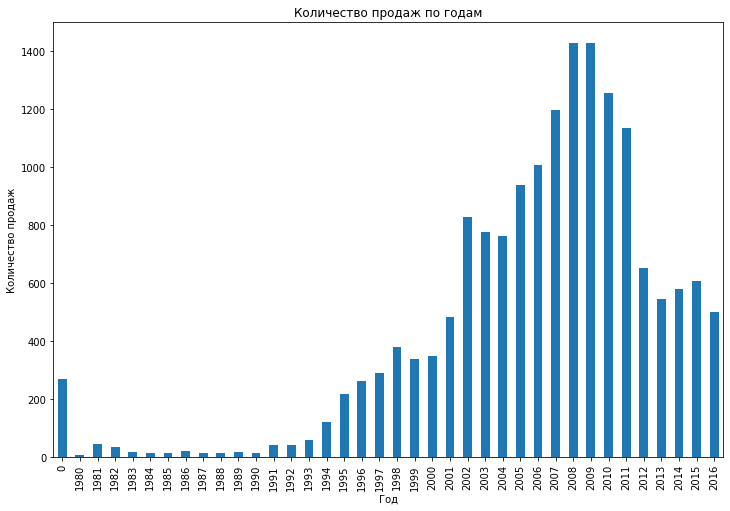

In [14]:
games_by_years.plot(kind = 'bar', 
                    title='Количество продаж по годам', 
                    xlabel='Год', 
                    ylabel='Количество продаж',
                    legend = False,
                    figsize=(12,8));

Актуальными данными, которые помогут построить прогноз на 2017 год, будет считать данные за период с 2012 по 2016 год, так как данные за более ранние период с 2002 по 2011 характеризуются значительно большими абсолютными значениями.

В дальнейших расчётах не учитываем в работе данные за предыдущие годы - возьмём данные за соответствующий актуальный период:

In [15]:
actual_years_data = data.query('year_of_release >= 2012')

Посмотрим, как менялись продажи по платформам.

Выберем платформы с наибольшими суммарными продажами: 

In [16]:
top5_platform_by_sales = actual_years_data.groupby(['platform']) \
.agg(number_of_games=('name', 'count')) \
.sort_values('number_of_games', ascending=False).head(5)
top5_platform_by_sales

,number_of_games
platform,
PS3,493
PSV,411
3DS,396
PS4,392
X360,292


Для этих платформ построим распределение по годам:

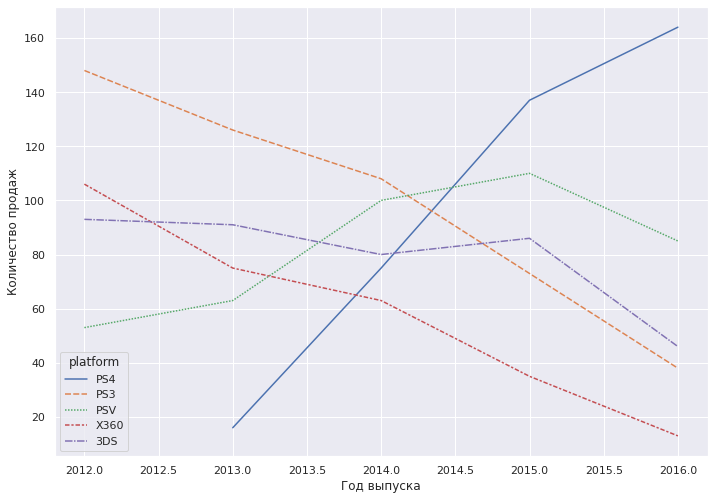

In [17]:
filter_top5_platform = actual_years_data['platform'].isin(['PS3', 'PSV', '3DS', 'PS4', 'X360'])

games_by_platform = actual_years_data[filter_top5_platform] \
.groupby(['year_of_release', 'platform']) \
.agg(number_of_games=('name', 'count')) \
.sort_values('number_of_games', ascending=False)


sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.lineplot(x='year_of_release', 
             y='number_of_games',
             hue = 'platform', 
             style='platform', 
             data=games_by_platform);
ax.set(xlabel='Год выпуска', ylabel='Количество продаж');

**Выводы:** Платформа PS4 появилась в 2013 году и с тех пор продажи игр для этой платформы резко растут - от 20 до свыше 160 миллионов копий. Продажи игр для платформы PS3 резко падают из года в год - с почти 150 до 40 миллионов копий. Продажи игр для платформы PSV умеренно расли с 2012 по 2015 год - с 50 до 110 миллионов, но в последний год наблюдался спад до почти 80 миллионов. Продажи игр для платформы X360 резко уменьшаются из года в год - с почти 105 до 15 миллионов копий. Продажи игр для платформы 3DS с 2012 по 2015 год были практически на одном уровне - в районе 90 миллионов копий, но в 2016 году наблюдалось снижение до 45 миллионов.

Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

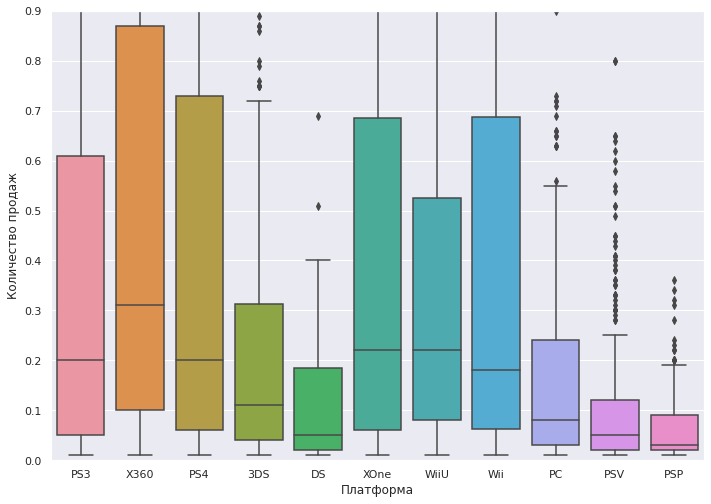

In [18]:
g = sns.boxplot(x='platform', y='total_sales', data=actual_years_data);
g.set(ylim=(0, 0.90), xlabel='Платформа', ylabel='Количество продаж');

**Вывод:** Наименьший размах значений имеют игры на платформах PSP, PSV, DS, PC И ЗDS - это значит, что из год в год независимо от жанров значения продаж изменяются незначительно. Для других платфом размах существенный - в пределах одной платформы есть более и менее продаваемые жанры (или годы выпуска или и то и другое). Потенциально самый высокий доход у X360 (если считать, что цены игр примерно одинаковы, но это не так, а данных нет) - значение медианы выше всего на графике по оси ординат, самый низкий у PSP.

Изучаем, как влияют на продажи внутри одной популярной платформы отзывы критиков.

**Для PS4**

Строим диаграмму рассеяния:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


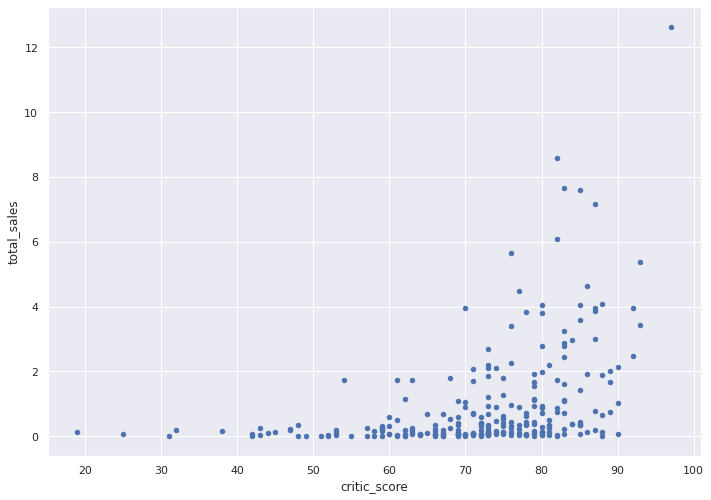

In [20]:
ps4_actual_years_data = actual_years_data[actual_years_data['platform'] == 'PS4']
ps4_actual_years_data.plot(x='critic_score', y='total_sales', kind='scatter');

Рассчитываем коэффициент корреляции Пирсона:

In [21]:
ps4_actual_years_data['total_sales'].corr(ps4_actual_years_data['critic_score'])

0.406567902061781

**Вывод:** Диаграмма рассеяния и коэффициент Пирсона, равный 0.41, говорят о наличии слабой положительной линейной связи. 

Изучаем, как влияют на продажи внутри одной популярной платформы отзывы пользователей.

Строим диаграмму рассеяния:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


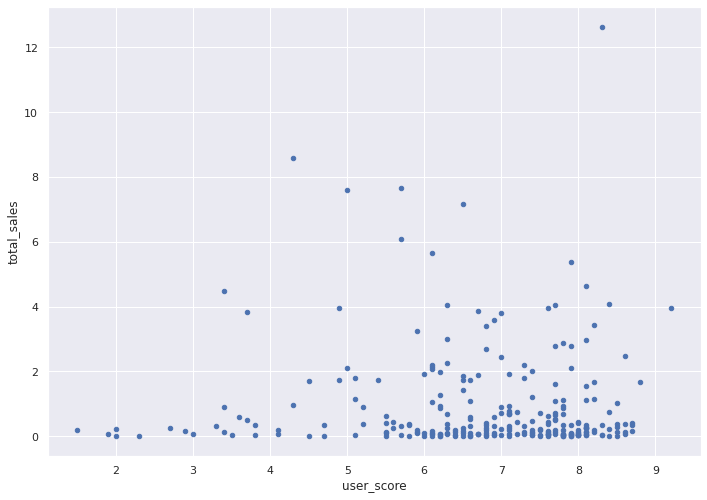

In [22]:
ps4_actual_years_data.plot(x='user_score', y='total_sales', kind='scatter');

Рассчитываем коэффициент корреляции Пирсона:

In [23]:
ps4_actual_years_data['total_sales'].corr(ps4_actual_years_data['user_score'])

-0.031957110204556376

**Вывод:** Диаграмма рассеяния и коэффициент Пирсона, равный -0.03, говорят об отсутствии линейной связи. 

**Для PS3**

Строим диаграмму рассеяния:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


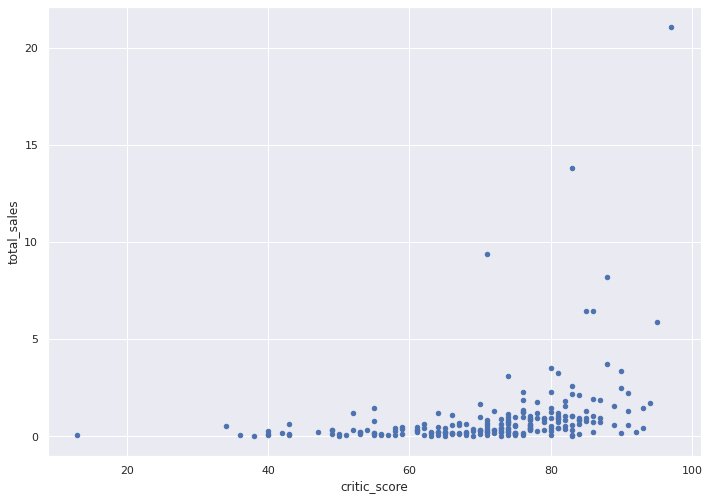

In [24]:
ps3_actual_years_data = actual_years_data[actual_years_data['platform'] == 'PS3']
ps3_actual_years_data.plot(x='critic_score', y='total_sales', kind='scatter');

Рассчитываем коэффициент корреляции Пирсона:

In [25]:
ps3_actual_years_data['total_sales'].corr(ps3_actual_years_data['critic_score'])

0.3314972592629587

**Вывод:** Диаграмма рассеяния и коэффициент Пирсона, равный 0.33, говорят о наличии слабой положительной линейной связи. 

Строим диаграмму рассеяния:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


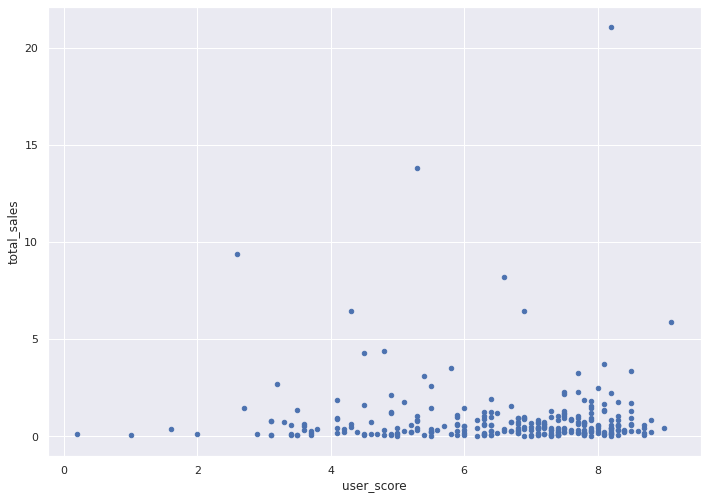

In [26]:
ps3_actual_years_data.plot(x='user_score', y='total_sales', kind='scatter');

Рассчитываем коэффициент корреляции Пирсона:

In [27]:
ps3_actual_years_data['total_sales'].corr(ps3_actual_years_data['user_score'])

-0.005143522887113828

**Вывод:** Диаграмма рассеяния и коэффициент Пирсона, равный 0, говорят об отсутствии линейной связи. 

**PSV**

Строим диаграмму рассеяния:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


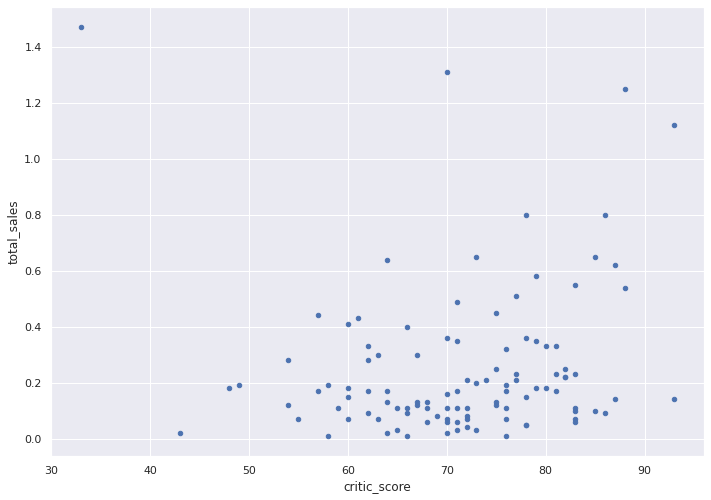

In [28]:
psv_actual_years_data = actual_years_data[actual_years_data['platform'] == 'PSV']
psv_actual_years_data.plot(x='critic_score', y='total_sales', kind='scatter');

Рассчитываем коэффициент корреляции Пирсона:

In [29]:
psv_actual_years_data['total_sales'].corr(psv_actual_years_data['critic_score'])

0.09448789929316172

**Вывод:** Диаграмма рассеяния и коэффициент Пирсона, равный 0.09, говорят об отсутствии линейной связи. 

Строим диаграмму рассеяния:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


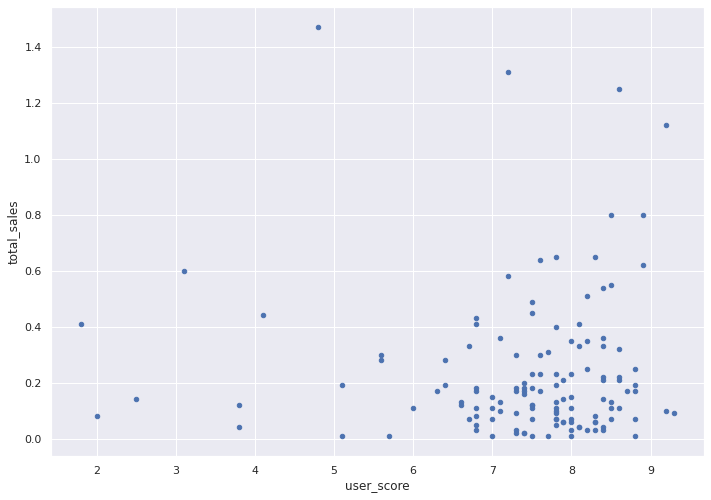

In [30]:
psv_actual_years_data.plot(x='user_score', y='total_sales', kind='scatter');

Рассчитываем коэффициент корреляции Пирсона:

In [31]:
psv_actual_years_data['total_sales'].corr(psv_actual_years_data['user_score'])

-0.004339437514314869

**Вывод:** Диаграмма рассеяния и коэффициент Пирсона, равный 0, говорят об отсутствии линейной связи. 

Изучаем общее распределение игр по жанрам.

In [32]:
games_by_genre = actual_years_data.groupby(['genre']).agg(median_sales=('total_sales', 'median')).sort_values('median_sales', ascending=False)
games_by_genre

,median_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


**Вывод:** Жанры игр, которые стабильно чаще всего продаются - Shooter, Sports и Platform, меньше всего покупают игры в жанре Puzzle и Adventure.

# 4. Составьте портрет пользователя каждого региона

Определяем для пользователя каждого региона самые популярные платформы (топ-5).

Для Северной Америки:

In [33]:
na_games_by_platform = actual_years_data.groupby(['platform']) \
.agg(number_of_games=('na_sales', 'sum')) \
.sort_values('number_of_games', ascending=False).head(5)
na_games_by_platform 

,number_of_games
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


Для Европы:

In [34]:
eu_games_by_platform = actual_years_data.groupby(['platform']) \
.agg(number_of_games=('eu_sales', 'sum')) \
.sort_values('number_of_games', ascending=False).head(5)
eu_games_by_platform 

,number_of_games
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


Для Японии:

In [35]:
jp_games_by_platform = actual_years_data.groupby(['platform']) \
.agg(number_of_games=('jp_sales', 'sum')) \
.sort_values('number_of_games', ascending=False).head(5)
jp_games_by_platform 

,number_of_games
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


**Выводы:** Самая популярная платформа в Северной Амереке - Xbox 360, в то время как в Европе она занимает 3-е место, а в Японии даже не входит в топ-5. Самая популярная платформа в Европе - PlayStation 4, в Северной Америке занимает 2-е место, а в Японии - 4-е. Самая популярная платформа в Японии - Nintendo 3DS, в Европе и Северной Америке замыкает первую пятёрку.

Определяем для пользователя каждого региона самые популярные жанры (топ-5).

Для Северной Америки:

In [36]:
na_games_by_genre = actual_years_data.groupby(['genre']) \
.agg(number_of_games=('na_sales', 'sum')) \
.sort_values('number_of_games', ascending=False).head(5)
na_games_by_genre

,number_of_games
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


Для Европы:

In [37]:
eu_games_by_genre = actual_years_data.groupby(['genre']) \
.agg(number_of_games=('eu_sales', 'sum')) \
.sort_values('number_of_games', ascending=False).head(5)
eu_games_by_genre

,number_of_games
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


Для Японии:

In [38]:
jp_games_by_genre = actual_years_data.groupby(['genre']) \
.agg(number_of_games=('jp_sales', 'sum')) \
.sort_values('number_of_games', ascending=False).head(5)
jp_games_by_genre

,number_of_games
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


**Вывод:** Самые популярный жанры в Северной Америке и Европе практически полностью совпадают. Это Action, Shooter, Sports и Role-Playing - эти жанры занимают с 1-е по 4-е место в рейтинге соответсвенно. Другая структура распределения жанров в Японии - 1-е место занимает Role-Playing, кроме этого, появляются непредставленные в двух других регионах жанры Simulation и Fighting.

Определяем, влияет ли рейтинг ESRB на продажи в отдельном регионе - строим столбчатые диаграммы.

Для Северной Америки:

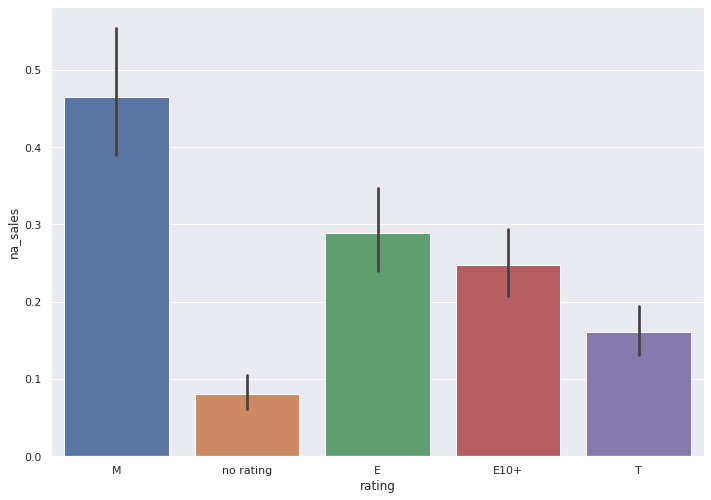

In [39]:
ax = sns.barplot(x="rating", y="na_sales", data=actual_years_data)

Для Европы:

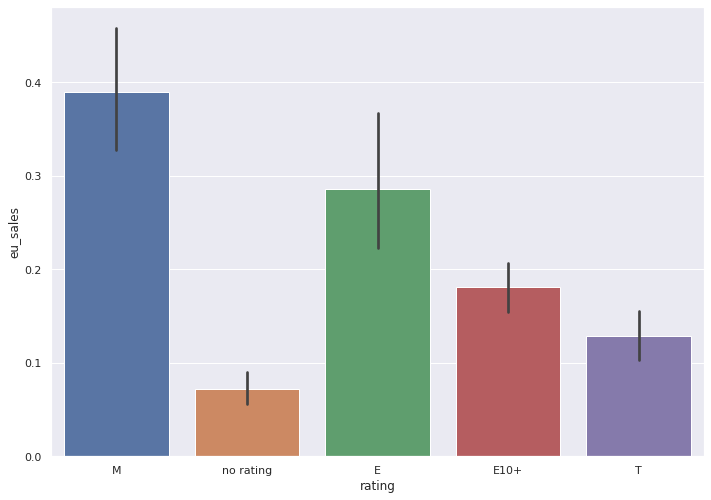

In [40]:
ax = sns.barplot(x="rating", y="eu_sales", data=actual_years_data)

Для Японии:

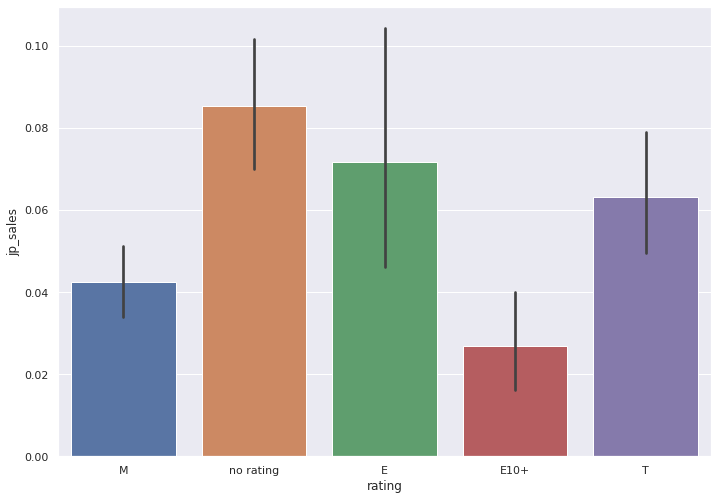

In [41]:
ax = sns.barplot(x="rating", y="jp_sales", data=actual_years_data)

**Выводы:** В Европе и Северной Америке самые продаваемые игры имеют рейтинг M. В Японии большинство игр не имеют рейтинга ESRB; среди игр, имеющих рейтинг, выделяются игры с рейтингом E. 

# 5. Проверка гипотез

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

```
H_0: Пользовательские рейтинги (user_score) платформы Xbox One = пользовательские рейтинги (user_score) платформы PC;
H_a: Пользовательские рейтинги (user_score) платформы Xbox One ≠ пользовательские рейтинги (user_score) платформы PC.
alpha = 0.05
```

In [42]:
from scipy import stats as st

XOne_data = actual_years_data.loc[actual_years_data['platform'] == 'XOne', 'user_score']
PC_data = actual_years_data.loc[actual_years_data['platform'] == 'PC', 'user_score']
results = st.ttest_ind(XOne_data, PC_data, equal_var = False) # results = вызов метода для проверки гипотезы

alpha = 0.05

print(results.pvalue )  
if (results.pvalue < alpha): 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

nan
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы: cредние пользовательские рейтинги жанров Action и Sports разные:

```
H_0: Пользовательские рейтинги (user_score) жанра Action = пользовательские рейтинги (user_score) жанра Sports;
H_a: Пользовательские рейтинги (user_score) жанра Action ≠ пользовательские рейтинги (user_score) жанра Sports.
alpha = 0.05
```

In [43]:
action_data = actual_years_data.loc[actual_years_data['genre'] == 'Action', 'user_score']
sports_data = actual_years_data.loc[actual_years_data['genre'] == 'Sports', 'user_score']
results = st.ttest_ind(action_data, sports_data, equal_var = False) # results = вызов метода для проверки гипотезы

alpha = 0.05

print(results.pvalue )  
if (results.pvalue < alpha): 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

nan
Не получилось отвергнуть нулевую гипотезу


Исследование прошло в четыре этапа:
 1. Обзор данных;
 2. Предобработка данных;
 3. Исследовательский анализ данных;
 4. Проверка гипотез.
 
На первом этапе был выполнен обзор данных, в ходе которого определялось их качество и наличие ошибок.

На второй этапе эти ошибки были устранены. Предобработка данных включала в себя заполнение пропущенных значений в столбцах, изменение типов данных столбца, расчёт новых значений.

В ходе последнего этапа - ислледовательского анализа данных и проверке гипотез - было установлено, что по имеющимя данным:
1. Платформа PS4 появилась в 2013 году и с тех пор продажи игр для этой платформы резко растут - от 20 до свыше 160 миллионов копий. Продажи игр для платформы PS3 резко падают из года в год - с почти 150 до 40 миллионов копий. Продажи игр для платформы PSV умеренно расли с 2012 по 2015 год - с 50 до 110 миллионов, но в последний год наблюдался спад до почти 80 миллионов. Продажи игр для платформы X360 резко уменьшаются из года в год - с почти 105 до 15 миллионов копий. Продажи игр для платформы 3DS с 2012 по 2015 год были практически на одном уровне - в районе 90 миллионов копий, но в 2016 году наблюдалось снижение до 45 миллионов;
2. Между продажами игр и отзывами критиков есть слабая линейная связь, а отзывы пользоватлей не влияют на объёмы;
3. Самые продаваемые жанры - Action, Shooter, Role-Playing и Sports, меньше всего покупают игры в жанре Strategy и Puzzle;
4. Самые популярный жанры в Северной Америке и Европе практически полностью совпадают. Это Action, Shooter, Sports и Role-Playing - эти жанры занимают с 1-е по 4-е место в рейтинге соответсвенно. Другая структура распределения жанров в Японии - 1-е место занимает Role-Playing, кроме этого, появляются непредставленные в двух других регионах жанры Simulation и Fighting;
5. Самые популярный жанры в Северной Америке и Европе практически полностью совпадают. Это Action, Shooter, Sports и Role-Playing - эти жанры занимают с 1-е по 4-е место в рейтинге соответсвенно. Другая структура распределения жанров в Японии - 1-е место занимает Role-Playing, кроме этого, появляются непредставленные в двух других регионах жанры Simulation и Fighting;
6. В Европе и Северной Америке самые продаваемые игры имеют рейтинг M. В Японии большинство игр не имеют рейтинга ESRB; среди игр, имеющих рейтинг, выделяются игры с рейтингом E;
7. У нас нет оснований утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются;
8. У нас есть основания утверждать, что средние пользовательские рейтинги жанров Action и Sports значимо различаются.
